In [1]:
%matplotlib inline
import sys
sys.path.insert(0, "../..")

{{ badge }}

In [2]:

import deeptrack as dt
import numpy as np
import skimage.color
import matplotlib.pyplot as plt

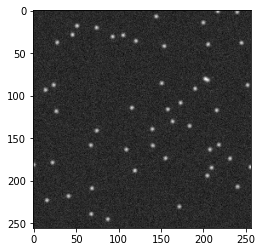

In [3]:
data = np.load("data/data.npy")
data = (data - np.min(data)) / np.ptp(data)

plt.imshow(data[0], cmap="gray")
plt.show()

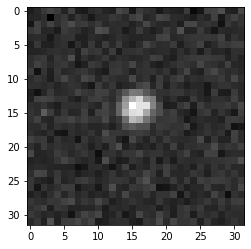

In [4]:
crop = data[0, 100:132, 100:132]
plt.imshow(crop, cmap="gray")

In [5]:
training_data = dt.Value(crop)

In [6]:
model = dt.models.LodeSTAR(input_shape=(None, None, 1))

In [7]:
model.fit(training_data, epochs=30, batch_size=8)

Generating 161 / 160 samples before starting training
Epoch 1/30
161/161 [==============================] - 6s 7ms/step - total_loss: 1.9184 - consistency_loss: 0.8566
Epoch 2/30
161/161 [==============================] - 2s 11ms/step - total_loss: 0.1016 - consistency_loss: 0.0330
Epoch 3/30
161/161 [==============================] - 2s 11ms/step - total_loss: 0.0478 - consistency_loss: 0.0040
Epoch 4/30
161/161 [==============================] - 2s 11ms/step - total_loss: 0.0459 - consistency_loss: 0.0032
Epoch 5/30
161/161 [==============================] - 2s 11ms/step - total_loss: 0.0439 - consistency_loss: 0.0034
Epoch 6/30
161/161 [==============================] - 2s 11ms/step - total_loss: 0.0434 - consistency_loss: 0.0031
Epoch 7/30
161/161 [==============================] - 1s 9ms/step - total_loss: 0.0370 - consistency_loss: 0.0032
Epoch 8/30
161/161 [==============================] - 2s 11ms/step - total_loss: 0.0353 - consistency_loss: 0.0029 1s - total
Epoch 9/30
161/16

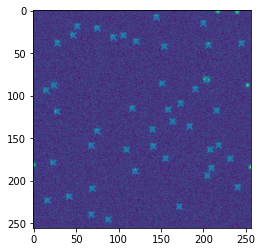

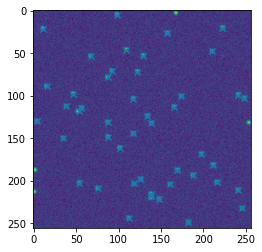

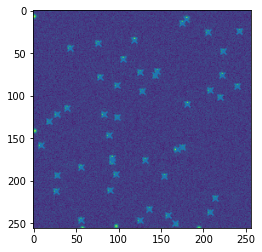

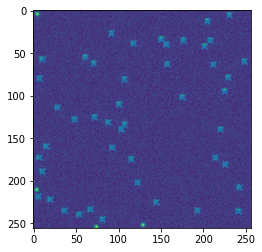

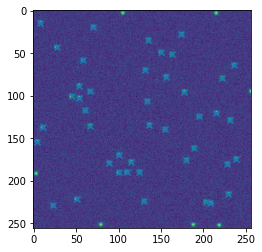

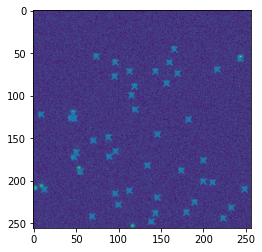

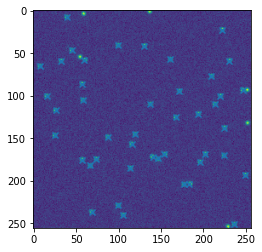

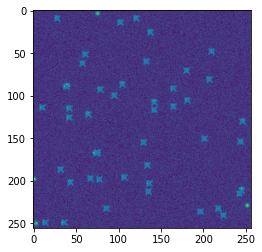

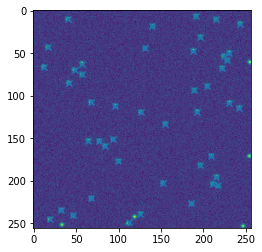

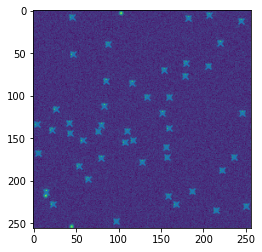

In [8]:
all_detections = model.predict_and_detect(data)

for frame, frame_detections in zip(data, all_detections):
    plt.imshow(frame)
    plt.scatter(frame_detections[:, 1], frame_detections[:, 0], marker="x")
    plt.show()